# Project: Business Public Sentiment

Design a model to predict the sentiment (positive or negative) of text and apply it to the twitter feed of a business.


## Structure

Take a look at the files in the directory to better understand the structure of the project. 

- `data/`: Folder containing the training and test data.
- `models/`: Folder containing models.
    - `baseline_model.py`: A baseline model to start with.
    - `model.py`: The final model.


## Understanding the data-set

The training data was in a single cvs file which was over 200M in size so I've split the file into smaller files for easy of use. You can also see the testdata which is very small relative to the amount of training data.

In [2]:
print("List all the files in the data directory\n")
!ls data

List all the files in the data directory

splitfile_1.csv
splitfile_10.csv
splitfile_11.csv
splitfile_12.csv
splitfile_13.csv
splitfile_14.csv
splitfile_15.csv
splitfile_16.csv
splitfile_2.csv
splitfile_3.csv
splitfile_4.csv
splitfile_5.csv
splitfile_6.csv
splitfile_7.csv
splitfile_8.csv
splitfile_9.csv
testdata.manual.2009.06.14.csv


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A94EBDCA58>,
      dtype=object)

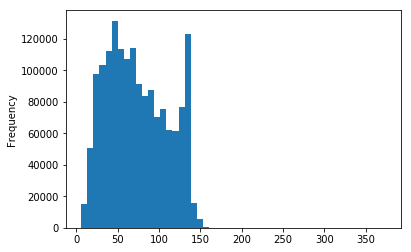

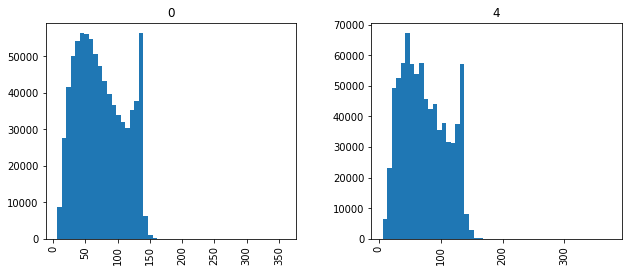

In [46]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the data
dataframe = pd.read_csv("data/training.1600000.processed.noemoticon.csv", sep=',', names=['labels','id', 'data', 'query', 'user', 'text'], encoding='ISO-8859-1', header=None)
#dataframe.head()

# Preprocess the data
twitterData = dataframe.drop(columns=['id', 'data', 'query', 'user'])
twitterData.head()
#twitterData.describe()
twitterData.groupby('labels').describe()

twitterData['length'] = twitterData['text'].apply(len)
twitterData.head()

twitterData['length'].plot(bins=50, kind = 'hist')

twitterData.hist(column='length', by='labels',bins=50,figsize = (10,4))

#twitterData.info()
#count_vector = CountVectorizer()
#count_vector.fit(twitterData)
#count_vector.get_feature_names()
#doc_array = count_vector.transform(twitterData).toarray()
#doc_array